# Projeto 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import yfinance as yf
from bcb import sgs
import matplotlib.ticker as tick
plt.style.use("cyberpunk")

In [2]:
cdi_data = sgs.get({'cdi':11}, start='1994-06-01')
cdi_data = cdi_data['cdi']
cdi_returns = cdi_data/100
cdi_cumulative_return = (1 + cdi_returns).cumprod()

In [3]:
ibov = yf.download('^BVSP', start='1994-06-01')['Adj Close']
ibov.index = (pd.to_datetime(ibov.index))
ibov = ibov.sort_index(ascending=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
final_mes_ibov = ibov.resample("M").last()
final_mes_cdi = cdi_cumulative_return.resample("M").last()

In [5]:
inicio_mes_ibov = ibov.resample("M").first()
inicio_mes_cdi = cdi_cumulative_return.resample("M").first()

In [6]:
retorno_final_mes_ibov = final_mes_ibov.pct_change(periods = 1).dropna()
retorno_final_mes_cdi = final_mes_cdi.pct_change(periods = 1).dropna()
retorno_inicio_mes_ibov = inicio_mes_ibov.pct_change(periods = 1).dropna()
retorno_inicio_mes_cdi = inicio_mes_cdi.pct_change(periods = 1).dropna()
retorno_inicio_mes_ibov = retorno_inicio_mes_ibov[retorno_inicio_mes_ibov.index > retorno_final_mes_ibov.index[1]]
retorno_inicio_mes_cdi = retorno_inicio_mes_cdi[retorno_inicio_mes_cdi.index > retorno_final_mes_cdi.index[1]]

df_retornos = pd.DataFrame(columns = ['Estratégia', 'Ibov', 'CDI'], index = retorno_final_mes_cdi.index)

In [7]:
for i, data in enumerate(retorno_final_mes_cdi.index): 

    if i < (len(retorno_final_mes_cdi.index) - 2):

        retorno_cdi_last_month = retorno_final_mes_cdi.loc[data]
        retorno_ibov_last_month = retorno_final_mes_ibov.loc[data]
        retorno_ibov_mes_seguinte = retorno_inicio_mes_ibov.iloc[i]
        retorno_cdi_mes_seguinte = retorno_inicio_mes_cdi.iloc[i]

        if retorno_cdi_last_month > retorno_ibov_last_month:

            retorno_estrategia = retorno_cdi_mes_seguinte

        else:

            retorno_estrategia = retorno_ibov_mes_seguinte

        df_retornos.loc[data, 'Estratégia'] = retorno_estrategia
        df_retornos.loc[data, 'Ibov'] = retorno_ibov_mes_seguinte
        df_retornos.loc[data, 'CDI'] = retorno_cdi_mes_seguinte

In [8]:
df_retornos = df_retornos.shift(1)
df_retornos = df_retornos.dropna()
df_acum = (1 + df_retornos).cumprod() - 1

df_acum = df_acum * 1000

df_acum.columns = ['MODELO', 'IBOV', 'CDI']

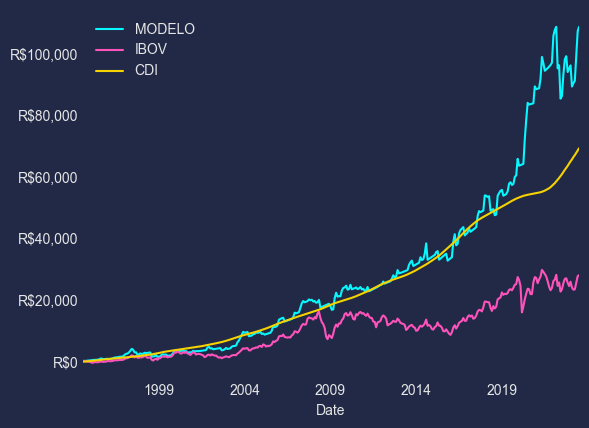

In [12]:
ax = df_acum.plot()
ax.yaxis.set_major_formatter(tick.StrMethodFormatter('R${x:,.0f}'))

plt.legend()
plt.grid(0)
plt.savefig('mtum.png', dpi = 300)